<a href="https://colab.research.google.com/github/Parinita-Jain/DeepLearning/blob/main/regtoday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130012,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009914,1000.002244
75%,564.921587,1000.637580,1000.645379
max,774.407854,1003.207934,1002.666308


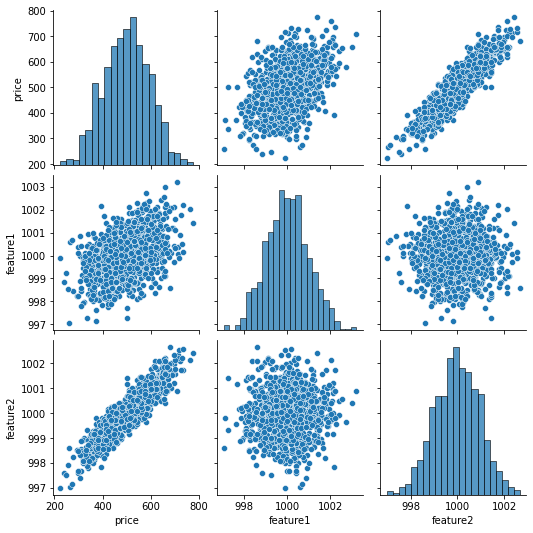

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [8]:
df.corr().style.background_gradient()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


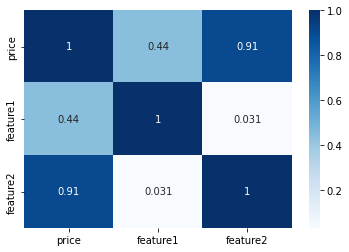

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [10]:
df.corr()["price"].sort_values()

feature1    0.444190
feature2    0.907576
price       1.000000
Name: price, dtype: float64

In [11]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [15]:
ann = Sequential()

ann.add(Dense(units=4, activation="relu")) # now we have 2 cols.. is it ok if we take more than 2 neurons.. its totally fine to give more neurons.
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=1))

ann.compile(optimizer="rmsprop", loss="mse")

ann.fit(xtrain, ytrain, epochs=250)

# now deep learning is kind of a black box, randomly weights are assigned , the random weights can also depend on system configuration.
# and when we restart the kernel, its very much possible that the old weights will be lost..
# So the solution is, once you run a model, save old weights.




Epoch 1/250
22/22 [==============================] - 3s 3ms/step - loss: 255753.2812
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 255612.1875
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 255484.2812
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 255354.9062
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255221.4219
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 255080.7031
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254931.0625
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 254768.3438
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 254592.5781
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254408.1875
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 254217.4688
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

In [16]:
loss = pd.DataFrame(ann.history.history)
loss.head()

,loss
0,255753.281250
1,255612.187500
2,255484.281250
3,255354.906250
4,255221.421875


In [17]:
loss.tail()

,loss
245,134.327362
246,128.573929
247,123.246460
248,118.002052
249,112.777199


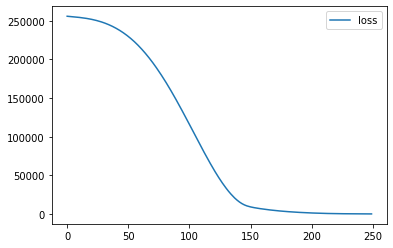

In [18]:
loss.plot()

In [19]:
ann.evaluate(xtrain, ytrain)

22/22 [==============================] - 0s 2ms/step - loss: 109.1745


109.17453002929688

In [20]:
ann.evaluate(xtest, ytest)

10/10 [==============================] - 0s 2ms/step - loss: 99.6291


99.62911224365234

In [21]:
np.sqrt(212)

14.560219778561036

In [22]:
ypred = ann.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [23]:
dic = {"Actual Y":ytest, "Predicted Y":ypred.flatten()} # since,ypred is 2-D
df1 = pd.DataFrame(dic)

In [24]:
df1.head()

,Actual Y,Predicted Y
0,489.057552,480.310425
1,526.210746,525.304688
2,518.360395,500.445892
3,552.778935,539.987488
4,649.395916,649.616760


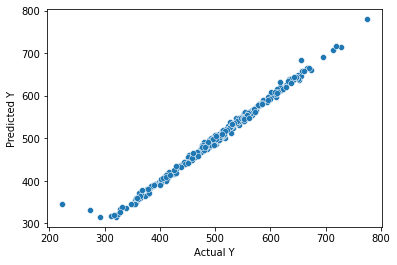

In [25]:
sns.scatterplot(x="Actual Y", y="Predicted Y", data=df1)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")

MSE : 99.6291215415903
RMSE : 9.9814388512674


In [27]:
# predicting new col

newdata = [[900, 950]]
newdata = sc.transform(newdata)
ann.predict(newdata)

1/1 [==============================] - 0s 17ms/step


array([[6593.7227]], dtype=float32)

In [28]:
ann.save("ANN_fake") # saving the model so that we just need to import it

In [29]:
from tensorflow.keras.models import load_model
fr = load_model("ANN_fake")

In [30]:
fr.predict(newdata)

1/1 [==============================] - 0s 44ms/step


array([[6593.7227]], dtype=float32)